# Part 1

In [24]:
import pandas as pd
import numpy as np
Cdata = pd.read_csv("Country-data.csv")
Cdata

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [25]:
Cdata.drop(labels = ["country"], axis = 1, inplace = True)
Cdata

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## Correlation of features 

<AxesSubplot:>

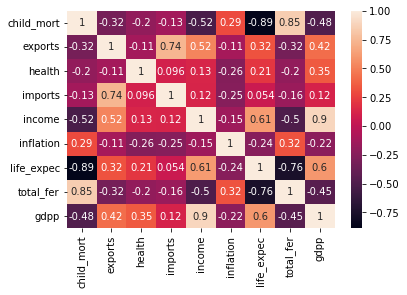

In [27]:
import seaborn as sb
corr = Cdata.corr()
sb.heatmap(corr, annot=True)

In [28]:
a=corr.abs()
upp = a.where(np.triu(np.ones(a.shape),k=1).astype(np.bool_))
upp

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,NaN,0.318093,0.200402,0.127211,0.524315,0.288276,0.886676,0.848478,0.483032
exports,NaN,NaN,0.114408,0.737381,0.516784,0.107294,0.316313,0.320011,0.418725
health,NaN,NaN,NaN,0.095717,0.129579,0.255376,0.210692,0.196674,0.345966
imports,NaN,NaN,NaN,NaN,0.122406,0.246994,0.054391,0.159048,0.115498
income,NaN,NaN,NaN,NaN,NaN,0.147756,0.611962,0.501840,0.895571
inflation,NaN,NaN,NaN,NaN,NaN,NaN,0.239705,0.316921,0.221631
life_expec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.760875,0.600089
total_fer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.454910
gdpp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Features that can be deleted

In [29]:
drop=[]
for i in upp.columns:
    if any(upp[i] > 0.85) :
        drop.append(i)
#Cdata.drop(labels =drop , axis = 1, inplace = True)
drop

['life_expec', 'gdpp']

## Normalization

In [31]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
Cdata=scale.fit_transform(Cdata)
Cdata=pd.DataFrame( data = Cdata ,
                    columns = ["child_mort" , "exports", "health","imports",
                               "income" ,"inflation","life_expec","total_fer","gdpp"])
Cdata

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## Kmeans and Elbow for optimal number of clusters

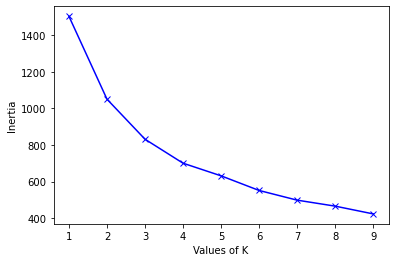

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
inertias = []
for k in range(1,10):
    model = KMeans(n_clusters=k,random_state=0).fit(Cdata)
    inertias.append(model.inertia_)
k= range(1,10)
plt.plot(k, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.show()

## Silhouette score

In [33]:
from sklearn.metrics import silhouette_score
score=[]
for i in range(2,10):
    model2 = KMeans(n_clusters=i,random_state=0).fit(Cdata)
    clusters=model2.predict(Cdata)
    score.append(silhouette_score(Cdata, clusters))
print(score)

[0.287356689214067, 0.28329575683463126, 0.3021082505899251, 0.22327899566511256, 0.23057357437984735, 0.25179867083491136, 0.22248886492792294, 0.23530641350791914]


## Clustering with optimal number of clusters 

In [34]:
optimal_model = KMeans(n_clusters=4,random_state=0).fit(Cdata)
clusters=optimal_model.predict(Cdata)
clusters

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 3, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

## Draw Scatter plot of three features two by two

Text(0, 0.5, 'exports')

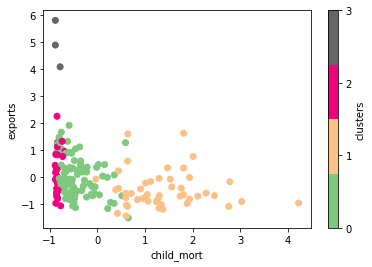

In [35]:
points=plt.scatter(Cdata["child_mort"],Cdata["exports"],c = clusters,cmap=plt.cm.get_cmap('Accent', 4))
cb=plt.colorbar(points)
cb.set_ticks([0,1,2,3])
cb.set_label(label='clusters')
plt.xlabel("child_mort")
plt.ylabel("exports")

Text(0, 0.5, 'income')

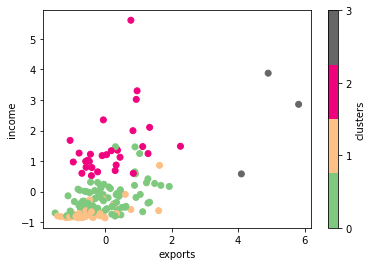

In [36]:
points=plt.scatter(Cdata["exports"],Cdata["income"],c= clusters,cmap=plt.cm.get_cmap('Accent', 4))
cb=plt.colorbar(points)
cb.set_ticks([0,1,2,3])
cb.set_label(label='clusters')
plt.xlabel("exports")
plt.ylabel("income")

Text(0, 0.5, 'income')

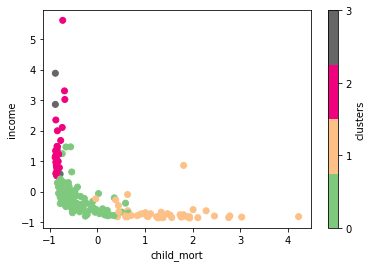

In [37]:
points=plt.scatter(Cdata["child_mort"],Cdata["income"],c=clusters,cmap=plt.cm.get_cmap('Accent', 4))
cb=plt.colorbar(points)
cb.set_ticks([0,1,2,3])
cb.set_label(label='clusters')
plt.xlabel("child_mort")
plt.ylabel("income")

# Part 2

## PCA

In [38]:
from sklearn.decomposition import PCA
pca_model = PCA()
Cdata_pca = pca_model.fit_transform(Cdata)
Cdata_pca=pd.DataFrame( data = Cdata_pca ,
                    columns = ["C1" , "C2", "C3","C4","C5" ,"C6","C7","C8","C9"])
Cdata_pca

,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,0.383000,0.415076,-0.014148
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0.248919,-0.221042,0.173316
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,-0.087214,-0.184162,0.084037
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,-0.440835,-0.355998,-0.091339
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0.241978,-0.023681,0.094270
...,...,...,...,...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748,0.009059,-0.098738,0.521886,-0.497803
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581,0.097274,0.206735,-0.078805,-0.275735
164,0.498524,1.390744,-0.238526,-1.074098,1.176081,0.051607,-0.143627,-0.217590,-0.036522
165,-1.887451,-0.109453,1.109752,0.056257,0.618365,-0.540917,0.060256,0.089495,-0.096049


## Percentage of Explained Variance

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]
[0.4595174  0.63133365 0.76137624 0.87190786 0.94530998 0.97015232
 0.98275663 0.99256944 1.        ]


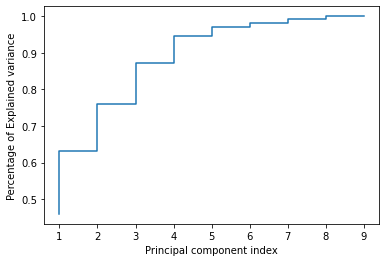

In [39]:
evr=pca_model.explained_variance_ratio_
evrsum=pca_model.explained_variance_ratio_.cumsum()
print(evr)
print(evrsum)
plt.step(range(1,len(evrsum)+1), evrsum)
plt.ylabel('Percentage of Explained variance')
plt.xlabel('Principal component index')
plt.show()

## Reducing dimention

In [40]:
from sklearn.decomposition import PCA
pca_model_reduced = PCA(n_components=3)
Cdata_pca_reduced = pca_model_reduced.fit_transform(Cdata)
Cdata_pca_reduced =pd.DataFrame( data = Cdata_pca_reduced ,
                    columns = ["C1" , "C2", "C3"])
Cdata_pca_reduced

,C1,C2,C3
0,-2.913025,0.095621,-0.718118
1,0.429911,-0.588156,-0.333486
2,-0.285225,-0.455174,1.221505
3,-2.932423,1.695555,1.525044
4,1.033576,0.136659,-0.225721
...,...,...,...
162,-0.820631,0.639570,-0.389923
163,-0.551036,-1.233886,3.101350
164,0.498524,1.390744,-0.238526
165,-1.887451,-0.109453,1.109752


## Kmean and Elbow for reduced data

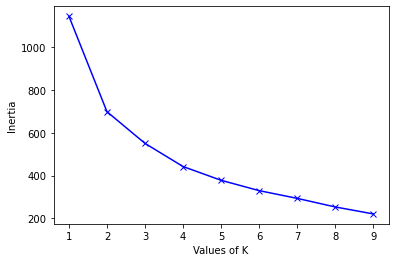

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
inertias = []
for k in range(1,10):
    model = KMeans(n_clusters=k,random_state=0).fit(Cdata_pca_reduced)
    inertias.append(model.inertia_)
k= range(1,10)
plt.plot(k, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.show()

## Silhouette score for reduced data

In [42]:
from sklearn.metrics import silhouette_score
score=[]
for i in range(2,10):
    model2 = KMeans(n_clusters=i,random_state=0).fit(Cdata_pca_reduced)
    clusters=model2.predict(Cdata_pca_reduced)
    score.append(silhouette_score(Cdata_pca_reduced, clusters))
print(score)

[0.3486469452367987, 0.36897078470659267, 0.3015307702202774, 0.2902046922169579, 0.30662407498060545, 0.29883706072445276, 0.2980687323252884, 0.3089946701583465]


## Kmeans clustering with optimal number of clusters for reduced data

In [43]:
reduced_model_kmean = KMeans(n_clusters=3).fit(Cdata_pca_reduced)
clusters=reduced_model_kmean.predict(Cdata_pca_reduced)
clusters

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

## Draw Scatter plot of three features two by two 

Text(0, 0.5, 'C2')

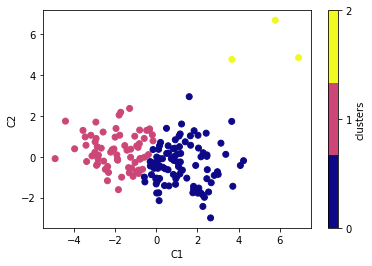

In [44]:
points=plt.scatter(Cdata_pca_reduced["C1"],Cdata_pca_reduced["C2"],c = clusters,cmap=plt.cm.get_cmap('plasma', 3))
cb=plt.colorbar(points)
cb.set_ticks([0,1,2])
cb.set_label(label='clusters')
plt.xlabel("C1")
plt.ylabel("C2")

Text(0, 0.5, 'C3')

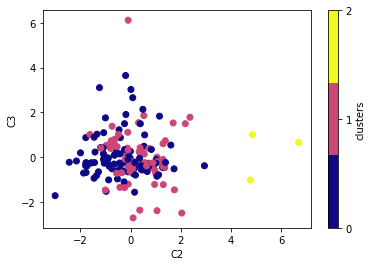

In [45]:
points=plt.scatter(Cdata_pca_reduced["C2"],Cdata_pca_reduced["C3"],c = clusters,cmap=plt.cm.get_cmap('plasma', 3))
cb=plt.colorbar(points)
cb.set_ticks([0,1,2])
cb.set_label(label='clusters')
plt.xlabel("C2")
plt.ylabel("C3")

Text(0, 0.5, 'C3')

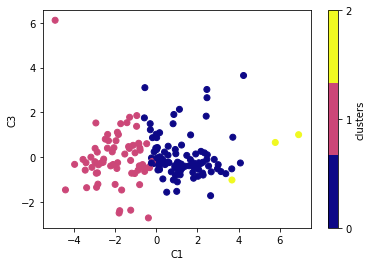

In [46]:
points=plt.scatter(Cdata_pca_reduced["C1"],Cdata_pca_reduced["C3"],c = clusters,cmap=plt.cm.get_cmap('plasma', 3))
cb=plt.colorbar(points)
cb.set_ticks([0,1,2])
cb.set_label(label='clusters')
plt.xlabel("C1")
plt.ylabel("C3")